# Building adjaceny list of the graph for data from Univ. of Washington

## Import libraries

In [91]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
%matplotlib inline 

In [2]:
df = pd.read_csv("../data/facebook-links.txt.anon", sep="\s+", header=None)
df.head()

,0,1,2
0,1,2,\N
1,1,3,\N
2,1,4,\N
3,1,5,\N
4,1,6,\N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545686 entries, 0 to 1545685
Data columns (total 3 columns):
0    1545686 non-null int64
1    1545686 non-null int64
2    1545686 non-null object
dtypes: int64(2), object(1)
memory usage: 35.4+ MB


In [4]:
df.describe()

,0,1
count,1.545686e+06,1.545686e+06
mean,1.893637e+04,1.879884e+04
std,1.377709e+04,1.376435e+04
min,1.000000e+00,1.000000e+00
25%,7.716000e+03,7.608000e+03
50%,1.622100e+04,1.602300e+04
75%,2.753000e+04,2.739000e+04
max,6.371900e+04,6.373100e+04


In [25]:
def convertToAdjacenyList(filename, graphDf, mode):
    """
    Function to convert given graph dataFrame in below format : 
        1 2
        1 3
        1 4
        2 10
    into format like below and return the same:
        1 2 3 4
        2 10
    """
    with open(filename, mode) as fileHandler:
        for user in df[0].unique():
            userFriendList = df[df[0]==user][1].values
            fileHandler.write(str(user)+" ")
            for friend in userFriendList:
                fileHandler.write(str(friend)+" ")
            fileHandler.write("\n")

In [26]:
# uncomment the below line to reconstruct the graph.
# graph already constructed

"""filename = "../data/adjList_UW.txt"
convertToAdjacenyList(filename,df, "w")"""

'filename = "../data/adjList_UW.txt"\nconvertToAdjacenyList(filename,df, "w")'

In [83]:
"""
ignore this step for now, currently on the implementaion using networkx library. 
"""
G= nx.read_adjlist("../data/adjList_10153478616753407")

FileNotFoundError: [Errno 2] No such file or directory: '../data/adjList_10153478616753407'

In [19]:
"""
readDataInMem: Read data from provided file into a list (one record per line)
               Returns list
"""

def readDataInMem():
    cols=[]
    rows=[]
    with open("../data/JSON_from_FB/adjList_10207648390994439",'rb') as fr:
        for line in fr:
            cols=line.split()
            if cols[-1]=='\\N':
                cols[-1]='0'
            cols=list(map(int,cols))
            rows.append(cols)
    return rows

In [20]:
rows=readDataInMem()

ValueError: invalid literal for int() with base 10: b'\x80\x04\x95[\x01\x01\x00\x00\x00\x00\x00}\x94(\x8c\x0efavorite_teams\x94]\x94}\x94(\x8c\x04name\x94\x8c\x14New'

In [130]:

"""
buildPerUserFrndLst: Build dict of {userId:[friendList]} from list provided
                     Returns the built dict
"""

def buildPerUserFrndLst():
    friendmap = {}
    cols = []
    with open("../data/adjList_UW.txt",'r') as fr:
        for line in fr:
            line = line.strip()
            res= line.split(" ")
            friendmap[res[0]] = res[1:]
    return friendmap

In [131]:
frndMap = buildPerUserFrndLst()
frndMap

{'1': ['2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27'],
 '28': ['29', '30', '31'],
 '32': ['33', '34', '35', '36', '37'],
 '38': ['39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49'],
 '50': ['51', '52', '7', '8', '53'],
 '54': ['55', '56', '57'],
 '58': ['59', '60', '61', '62', '63'],
 '64': ['65', '66', '67', '68', '69', '70', '71', '72'],
 '73': ['74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85'],
 '59': ['58'],
 '86': ['87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
  '122',
  '123',
  '124',
  '125',
  '126',
  '127',
  '128',
  '1

In [132]:
"""
recommendFrnd: 1. Read data from file containing friends
               2. Build per user friendList 
               3. Find most probable friend for given seed on the 
                  basis of max mutual friends
"""

def recommendFrnd(seed,frndMap):
    level1Frnds=[]
    level1Frnds=frndMap[seed] # Friend list for the provided seed (format: List of friend Ids)
    probableFrnd=0
    support=0
    probableFrnd,support=frndWithMaxMutualCount(level1Frnds,frndMap,seed)   # probable friend Id and tot mutual friends
    return probableFrnd,support

 



"""
frndWithMaxMutualCount: Calculate the occurence of each Id found at level2 (i.e. friends of level1 friends)
                        Returns the userId with max count and count
"""

def frndWithMaxMutualCount(level1Frnds,frndMap,seed):
    level2Frnds= set()
    freqCnt={}
    thisFrndFrnds=[]

    #iterate through level1 friends

    for i in level1Frnds:
        if i in frndMap.keys():        
            thisFrndFrnds=frndMap[i]
                                     #get friendlist of level1 friend
            for j in thisFrndFrnds:  #for each friend l2 of level1 friend l1,
                if j != seed:       # if l1 not one of level1 friend add t to set
                                     # and set frequency to 1. 
                    if j not in level1Frnds: 
                        if j in level2Frnds:
                            freqCnt[j]=freqCnt[j]+1
                        else:
                            level2Frnds.add(j)
                            freqCnt[j]=1
    if len(freqCnt)>0:
        friendToSuggest=max(freqCnt, key=freqCnt.get)
        len(frndMap.values())
        return friendToSuggest,freqCnt[friendToSuggest]
    else:        
        return 0,0

In [133]:
"""
Get suggestion for all users by calling recommendFrnd iteratively for all users
"""

visited={}
supportFreq={}
noMutualToShow=set()
listOfMutualFrndCnt=[]
for seed in frndMap:
    probableFrnd,support=recommendFrnd(seed,frndMap) 
    visited[seed]=[]
    visited[seed].append(probableFrnd)
    visited[seed].append(support)
    
    if support==0:
        noMutualToShow.add(seed)
        
    if support in supportFreq:
        supportFreq[support]=supportFreq[support]+1
    else:
        supportFreq[support]=1
    
    listOfMutualFrndCnt.append(support)

In [134]:
#total users
print("Total users in dataset: "+str(len(visited)))



#suggestions to show for each userid
listOfSugg=[]
for user in visited:
    tempDict={}  
    tempDict['max_mutual_frnds']=visited[user][1]      
    tempDict['suggest']=visited[user][0]
    tempDict['user']=user
    listOfSugg.append(tempDict)
    
  
dfSugg = pd.DataFrame(listOfSugg)
dfSugg



Total users in dataset: 60102


,max_mutual_frnds,suggest,user
0,11,2056,1
1,1,6258,28
2,3,163,32
3,3,165,38
4,3,2,50
5,1,9746,54
6,1,559,58
7,6,2769,64
8,4,16634,73
9,1,60,59


In [144]:
visited.keys()

dict_keys(['1', '28', '32', '38', '50', '54', '58', '64', '73', '59', '86', '161', '208', '219', '232', '282', '162', '303', '356', '373', '87', '444', '453', '475', '88', '549', '555', '60', '89', '570', '304', '631', '657', '61', '711', '732', '658', '748', '758', '571', '812', '559', '850', '855', '858', '209', '958', '968', '990', '998', '1012', '1035', '1051', '969', '1063', '1070', '749', '1117', '1119', '659', '446', '1146', '1169', '163', '509', '1170', '1171', '33', '90', '1248', '1259', '1270', '1272', '1277', '1280', '1284', '1346', '1036', '1356', '210', '510', '1404', '1553', '1576', '1584', '1405', '813', '1659', '1685', '1698', '1406', '1590', '1747', '1407', '1785', '1808', '1408', '1888', '1749', '164', '1964', '511', '1829', '2007', '2014', '2', '454', '1409', '2092', '1999', '2108', '2117', '2118', '2165', '2119', '2176', '1222', '1686', '1636', '2224', '2232', '2237', '2249', '2000', '2120', '2269', '1687', '738', '2374', '2071', '2390', '2391', '165', '2434', '166'

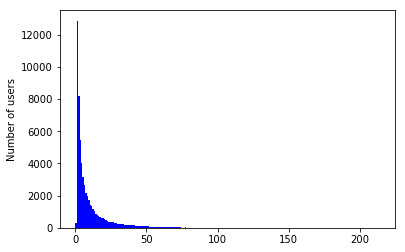

In [147]:
plt.hist(listOfMutualFrndCnt,color='b',bins=range(min(listOfMutualFrndCnt),max(listOfMutualFrndCnt)+1))
plt.ylabel('Number of users')
plt.show()

In [136]:
#number of users with no mutual friend to show
print("Total users with No recommendations: "+(str(len(noMutualToShow))))
print("Inference: These users are disjoint graphs i.e. they are cyclic and every user of a graph is friend with all the users present in the same graph.")

#userids with no mutual friend to show

noMutualToShowDf= pd.DataFrame(list(noMutualToShow))
noMutualToShowDf


Total users with No recommendations: 328
Inference: These users are disjoint graphs i.e. they are cyclic and every user of a graph is friend with all the users present in the same graph.


,0
0,62832
1,62302
2,61909
3,61852
4,62299
5,63542
6,44093
7,59203
8,62472
9,60084
